In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter('ignore')
plt.style.use('dark_background')
from sklearn.metrics import mean_squared_error as mse

In [2]:
data = pd.read_csv('transformed_housing_data2')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
sale_price = data['Sale_Price'].head(30)
flat_area = data['Flat Area (in Sqft)'].head(30)
sample_data = pd.DataFrame({'sale_price': sale_price, 'flat_area': flat_area})
sample_data

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


# implementing the gradient descent algorithm in python

# .Step 1.  Initialize parameters

In [4]:
def param_init (Y):
     '''
     Y = target variable
     that returns initialied values of m and c
     '''
     m = 0.1
     c = Y.mean()
     return m, c
    

# Step 2. generate the predictions

In [5]:
def generate_predictions(m, c, X):
    '''
    X = independent variable 
    returs the prediction generated by the line with parameters m and c
    '''
    prediction = []
    for x in X:
        pred = (m * x) + c
        prediction.append(pred)
    return prediction

# Step 3. Computing the cost function

In [6]:
def compute_cost(prediction, Y):
    '''
    returns the mean squared error between prediction and Y
    '''
    cost = np.sum(((prediction - Y)**2)/len(Y))
    return cost

# Step 4. updation of parameters 

## (i) generating the gradients

In [7]:
def gradients(prediction, Y, X):
    '''
    returns the gradient wrt to m and c
    '''
    n = len(Y)
    Gm = 2/n * np.sum((prediction - Y) * X)
    Gc = 2/n * np.sum((prediction - Y))
    return Gm, Gc

## (ii) updating the parameters

In [8]:
def param_update(m_old, c_old, Gm_old, Gc_old, alpha):
    '''
    upadate and return the new values of m and c
    '''
    m_new = m_old - alpha * Gm_old
    c_new = c_old - alpha * Gc_old
    return m_new, c_new

# Step 5. the final result / display function

In [9]:
def result(m, c, X, Y, cost, predictions, i):
    '''
    Print and plot the final result obtained from the gradient descent 
    '''
    ## IF the gradient descent converged to an optimum value before the max_iter
    if i < max_iter - 1:
        print("***** Gradient Descent has converged at iteration {} ***** ".format(i))
    else:
        print("***** Result after", max_iter, 'iteration is: *****')
        
    ## plotting the final result
    plt.figure(dpi = 120, figsize = (14, 7))
    plt.scatter(X, Y, color = 'red', label = 'data points')
    label = 'final regression line: m = {}; c = {}'.format(str(m), str(c))
    plt.plot(X, predictions, color = 'green', label = label)
    plt.xlabel('flat_area')
    plt.ylabel('sale_price')
    plt.title('final regression line')
    plt.legend()

# Main Function

After iterations 0 :m =  3499072.307222223 ; c =  465999.44299999997 : Cost =  64177937552.075005
After iterations 20 :m =  7.115927055971628e+105 ; c =  2.997778392048355e+102 : Cost =  2.7417231010181384e+208
After iterations 40 :m =  1.447154337383132e+205 ; c =  6.096532424296826e+201 : Cost =  inf
After iterations 60 :m =  2.9430538842431367e+304 ; c =  1.2398417341018387e+301 : Cost =  inf
After iterations 80 :m =  nan ; c =  nan : Cost =  nan
After iterations 100 :m =  nan ; c =  nan : Cost =  nan
After iterations 120 :m =  nan ; c =  nan : Cost =  nan
After iterations 140 :m =  nan ; c =  nan : Cost =  nan
After iterations 160 :m =  nan ; c =  nan : Cost =  nan
After iterations 180 :m =  nan ; c =  nan : Cost =  nan
After iterations 200 :m =  nan ; c =  nan : Cost =  nan
After iterations 220 :m =  nan ; c =  nan : Cost =  nan
After iterations 240 :m =  nan ; c =  nan : Cost =  nan
After iterations 260 :m =  nan ; c =  nan : Cost =  nan
After iterations 280 :m =  nan ; c =  nan 

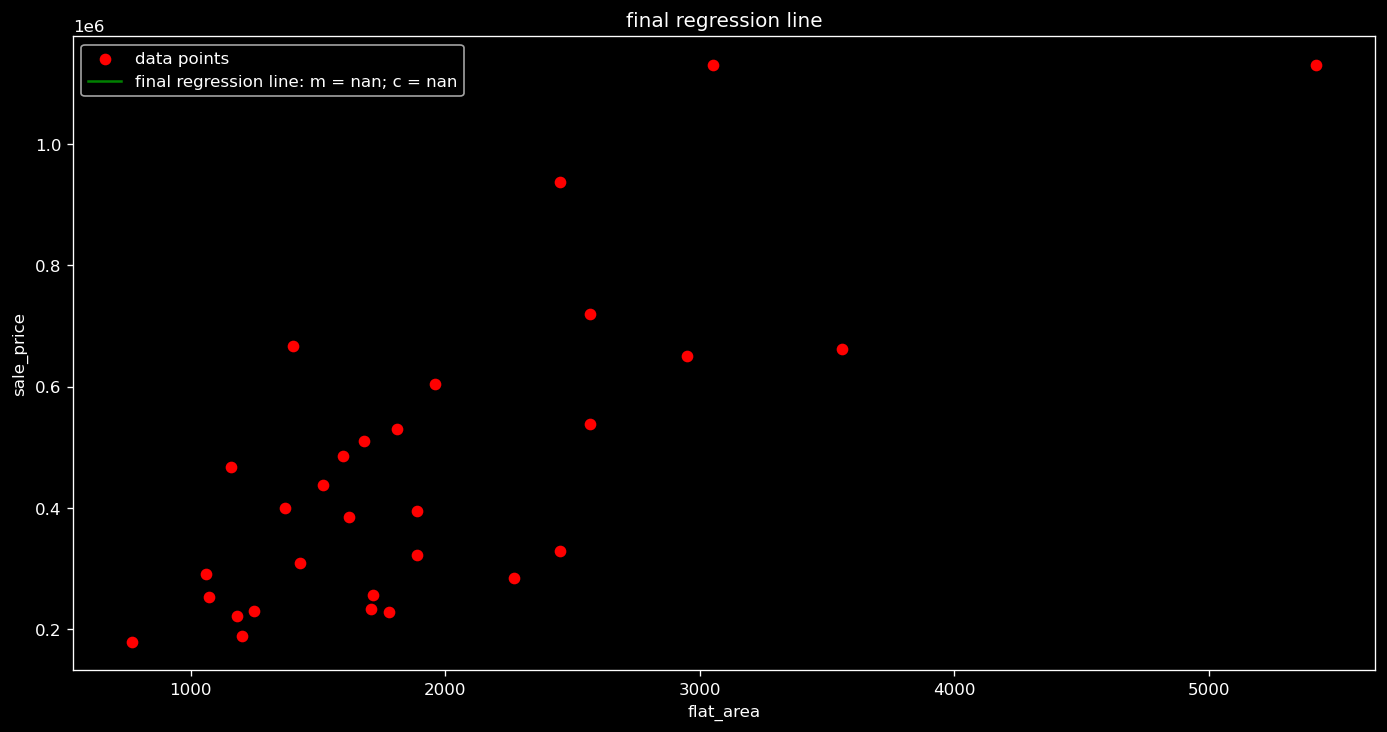

In [10]:
## defining and reshaping the dataset 
sale_price = sample_data['sale_price'].values.reshape(-1,1)
flat_area = sample_data['flat_area'].values.reshape(-1,1)

##defining the parameters
max_iter = 1000
cost_old = 0
alpha = 0.01

##step 1
m, c = param_init(sale_price)

## Gradient descent in action
for i in range(0, max_iter):
    
    ## Step 2
    predictions = generate_predictions(m, c, flat_area)
    
    ## Step 3
    cost_new = compute_cost(predictions, sale_price)
    
    ## Checking the convergence of gradient descent
    if abs(cost_new - cost_old) < 10**(-7):
        break
    
    ##calculating the gradients
    Gm, Gc = gradients(predictions, sale_price, flat_area)
    
    ##Step 4
    m, c = param_update(m, c, Gm, Gc, alpha)
    
    ##display result after 20 iterations
    if i%20 == 0 :
        print('After iterations', i, ':m = ', m, '; c = ', c,': Cost = ', cost_new )
        
    ## updating the cost_old
    cost_old = cost_new
    
## final results
result(m, c, flat_area, sale_price, cost_new, predictions, i)
    

In [11]:
## we can see that the model failed this happened because we did not scale the dataset before implementing the funtion 
## so the cost function exploded as a ressult of the high values in it

After iterations 0 :m =  0.11316346413633305 ; c =  1.1849780416165836e-16 : Cost =  0.85836535863667
After iterations 20 :m =  0.3275595607435688 ; c =  1.240489192847842e-16 : Cost =  0.6182472245590185
After iterations 40 :m =  0.4706921039517346 ; c =  1.3248661427193537e-16 : Cost =  0.5112264752046607
After iterations 60 :m =  0.5662485308150865 ; c =  1.415904430738617e-16 : Cost =  0.46352728398628984
After iterations 80 :m =  0.6300427631414932 ; c =  1.4951003398285442e-16 : Cost =  0.4422677351921283
After iterations 100 :m =  0.6726323011945988 ; c =  1.611303683072644e-16 : Cost =  0.4327923457067555
After iterations 120 :m =  0.7010654163122192 ; c =  1.666074685620818e-16 : Cost =  0.42856916078553225
After iterations 140 :m =  0.7200475906265729 ; c =  1.6660746856208182e-16 : Cost =  0.4266868855601835
After iterations 160 :m =  0.7327202415200801 ; c =  1.669405354694694e-16 : Cost =  0.42584795473189874
After iterations 180 :m =  0.7411806042798547 ; c =  1.669405354

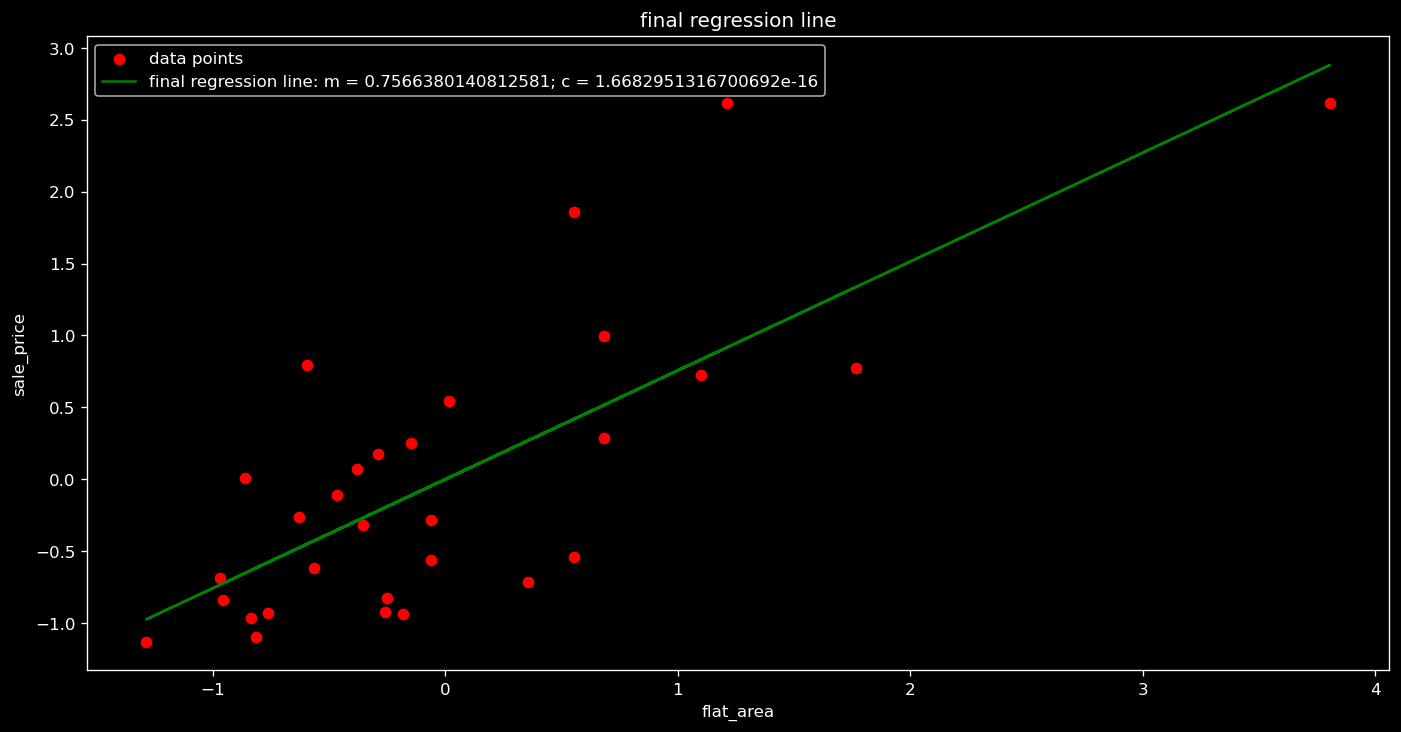

In [12]:
## we scale the dataset before excuting the entire function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## defining and reshaping the dataset 
sale_price = scaler.fit_transform(sample_data['sale_price'].values.reshape(-1,1))
flat_area = scaler.fit_transform(sample_data['flat_area'].values.reshape(-1,1))

##defining the parameters
max_iter = 1000
cost_old = 0
alpha = 0.01

##step 1
m, c = param_init(sale_price)

## Gradient descent in action
for i in range(0, max_iter):
    
    ## Step 2
    predictions = generate_predictions(m, c, flat_area)
    
    ## Step 3
    cost_new = compute_cost(predictions, sale_price)
    
    ## Checking the convergence of gradient descent
    if abs(cost_new - cost_old) < 10**(-7):
        break
    
    ##calculating the gradients
    Gm, Gc = gradients(predictions, sale_price, flat_area)
    
    ##Step 4
    m, c = param_update(m, c, Gm, Gc, alpha)
    
    ##display result after 20 iterations
    if i%20 == 0 :
        print('After iterations', i, ':m = ', m, '; c = ', c,': Cost = ', cost_new )
        
    ## updating the cost_old
    cost_old = cost_new
    
## final results
result(m, c, flat_area, sale_price, cost_new, predictions, i)
    